# 1. Tennis Surface Check

Use a linear regression and statsmodels to find which surface type predicts the most points for Federer in the `tennis.csv` dataset.

1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value. 

2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest (hint: you can run a t-test only with mean values and standard deviations)

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
t = pd.read_csv('data/tennis.csv')
t_x = pd.get_dummies(t['surface'],drop_first=True)
t_y = t['player1 total points won'].fillna(0)
t['surface'].unique()

array(['Indoor: Hard', 'Outdoor: Clay', 'Indoor: Carpet', 'Outdoor: Hard',
       'Outdoor: Grass', 'Indoor: Clay'], dtype=object)

In [3]:
t_x = sm.add_constant(t_x)

t_model = sm.OLS(t_y,t_x).fit()
t_prediction = t_model.predict(t_x)
t_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player1 total points won   R-squared:                       0.062
Model:                                  OLS   Adj. R-squared:                  0.058
Method:                       Least Squares   F-statistic:                     15.38
Date:                      Fri, 22 Jan 2021   Prob (F-statistic):           1.13e-14
Time:                              19:47:21   Log-Likelihood:                -5955.6
No. Observations:                      1179   AIC:                         1.192e+04
Df Residuals:                          1173   BIC:                         1.195e+04
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             62.4211      4.348     14.358      0.000      53.891      70.951
Indoor: Clay     -62.4211     16.072     -3.884      0.000     -93.955     -30.888
Indoor: Hard       3.7471      5.026      0.746      0.456      -6.113      13.607
Outdoor: Clay     13.9926      4.967      2.817      0.005       4.248      23.738
Outdoor: Grass    30.1361      5.400      5.581      0.000      19.541      40.731
Outdoor: Hard     15.4462      4.678      3.302      0.001       6.268      24.624
==============================================================================
Omnibus:                       21.727   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.333
Skew:                          -0.261   Prob(JB):                     3.15e-06
Kurtosis:                       3.493   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1.1.
There's a postive relationship for Indoor: Hard, Outdoor: Clay, Outdoor: Grass, Outdoor: Hard compared to Indoor: Carpet.
There's a negative relationship for Indoor: Clay. compared to Indoor: Carpet.
1.2.
Based on the summary, the summary should include the constant.
While the R^2 is higher than the summary with constant,the AIC and BIC are lower with constant. The lower AIC and BIC are, the closer it is to true value.  The constant recognizes Indoor:Clay as statistically significant while it shows not significant without a contstant. The constant recognizes Indoor: Hard statistically not significant while it shows statistically significant without a constant.

In [4]:
#1.2
t_x1 = pd.get_dummies(t['surface'],drop_first=True)
t_model1 = sm.OLS(t_y,t_x1).fit()
t_prediction1 = t_model1.predict(t_x1)
t_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player1 total points won   R-squared (uncentered):                   0.768
Model:                                  OLS   Adj. R-squared (uncentered):              0.767
Method:                       Least Squares   F-statistic:                              778.1
Date:                      Fri, 22 Jan 2021   Prob (F-statistic):                        0.00
Time:                              19:47:28   Log-Likelihood:                         -6051.0
No. Observations:                      1179   AIC:                                  1.211e+04
Df Residuals:                          1174   BIC:                                  1.214e+04
Df Model:                                 5                                                  
Covariance Type:                  nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Indoor: Clay            0     16.771          0      1.000     -32.904      32.904
Indoor: Hard      66.1681      2.733     24.215      0.000      60.807      71.529
Outdoor: Clay     76.4137      2.603     29.353      0.000      71.306      81.521
Outdoor: Grass    92.5571      3.472     26.659      0.000      85.745      99.369
Outdoor: Hard     77.8672      1.871     41.616      0.000      74.196      81.538
==============================================================================
Omnibus:                       17.762   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.610
Skew:                           0.044   Prob(JB):                     2.25e-07
Kurtosis:                       3.784   Cond. No.                         8.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
#1.3
import scipy 
from scipy import stats
surface = t[['surface','player1 total points won']].dropna()
surface['player1 total points won'] = surface['player1 total points won'].astype(float)
i_carpet =surface[surface['surface'] == 'Indoor: Carpet']['player1 total points won'].astype(float)
i_clay = surface[surface['surface'] == 'Indoor: Clay']['player1 total points won'].astype(float)
i_hard = surface[surface['surface'] == 'Indoor: Hard']['player1 total points won'].astype(float)
o_clay = surface[surface['surface'] == 'Outdoor: Clay']['player1 total points won'].astype(float)
o_grass = surface[surface['surface'] == 'Outdoor: Grass']['player1 total points won'].astype(float)
o_hard = surface[surface['surface'] == 'Outdoor: Hard']['player1 total points won'].astype(float)

In [6]:
print(scipy.stats.ttest_ind(o_grass,o_hard))

Ttest_indResult(statistic=3.6425166258906754, pvalue=0.00029515038007710737)


# 2. Titanic prediction contest

Use whatever tricks you can to best model whether a passenger would survive the titanic disaster (using linear regression).

1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did

2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?

3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
titanic['who_class'] = titanic['who'].astype(str)+"_"+titanic['class'].astype(str)
titanic1 = titanic.drop(['deck','who','age','who_class','adult_male','alone','sex','alive','pclass','embark_town','embarked','class'],axis=1)

In [10]:
who_class = pd.get_dummies(titanic['who_class'], drop_first=True)
titanic1 = pd.concat([who_class,titanic1.fare],axis=1)

titanic_y = titanic['survived']
titanic_x1 = titanic1
titanic_x1 = sm.add_constant(titanic_x1)

titanic_model1 = sm.OLS(titanic_y,titanic_x1).fit()
titanic_prediction1 = titanic_model1.predict(titanic_x1)
titanic_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     75.51
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          3.60e-103
Time:                        19:48:21   Log-Likelihood:                -367.24
No. Observations:                 891   AIC:                             754.5
Df Residuals:                     881   BIC:                             802.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8348      0.157      5.334      0.000       0.528       1.142
child_Second     0.1655      0.176      0.942      0.347      -0.179       0.510
child_Third     -0.4035      0.162     -2.492      0.013      -0.721      -0.086
man_First       -0.4812      0.156     -3.094      0.002      -0.786      -0.176
man_Second      -0.7538      0.159     -4.734      0.000      -1.066      -0.441
man_Third       -0.7156      0.157     -4.562      0.000      -1.023      -0.408
woman_First      0.1443      0.155      0.929      0.353      -0.160       0.449
woman_Second     0.0745      0.161      0.462      0.644      -0.242       0.391
woman_Third     -0.3434      0.159     -2.161      0.031      -0.655      -0.031
fare         -1.055e-05      0.000     -0.033      0.974      -0.001       0.001
==============================================================================
Omnibus:                       83.088   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.502
Skew:                           0.811   Prob(JB):                     2.03e-23
Kurtosis:                       3.432   Cond. No.                     2.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2.1.  Per the movie Titanic, the person on the speaker? said woman and children first on the boat. I chose my first model as who_class(combining column who and class, + fare) because I was curious of the survival rate. Im generalizing the fareas it varies the higher the fare, the richer they are.  I had the same curiosity for the second table except instead of fare, it was alone. Thoese are alone has better change of surviving than those who are not.
2.2. The second table is doing better than the first table in both AIC, BIC and RSquared. The tables are similar in the sense that men are less likely to survive than a child in first class. To reflect this on real life, I guess it's not surprisive for first class to survive since they have the most resources.

In [11]:
titanic_x2 = pd.concat([pd.get_dummies(titanic['who_class'], drop_first=True),pd.get_dummies(titanic['alone'], drop_first=True,prefix="alone_")],axis=1)

titanic_x2 = sm.add_constant(titanic_x2)

titanic_model2 = sm.OLS(titanic_y,titanic_x2).fit()
titanic_prediction2 = titanic_model2.predict(titanic_x2)
titanic_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     76.00
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          1.05e-103
Time:                        19:48:25   Log-Likelihood:                -365.99
No. Observations:                 891   AIC:                             752.0
Df Residuals:                     881   BIC:                             799.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8333      0.150      5.563      0.000       0.539       1.127
child_Second     0.1667      0.172      0.970      0.332      -0.171       0.504
child_Third     -0.4070      0.157     -2.586      0.010      -0.716      -0.098
man_First       -0.5088      0.155     -3.291      0.001      -0.812      -0.205
man_Second      -0.7853      0.156     -5.044      0.000      -1.091      -0.480
man_Third       -0.7513      0.153     -4.910      0.000      -1.052      -0.451
woman_First      0.1279      0.155      0.825      0.410      -0.176       0.432
woman_Second     0.0539      0.157      0.343      0.731      -0.254       0.362
woman_Third     -0.3638      0.154     -2.358      0.019      -0.667      -0.061
alone__True      0.0450      0.029      1.577      0.115      -0.011       0.101
==============================================================================
Omnibus:                       82.984   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.350
Skew:                           0.809   Prob(JB):                     2.19e-23
Kurtosis:                       3.441   Cond. No.                         47.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

Text(0, 0.5, 'survived')

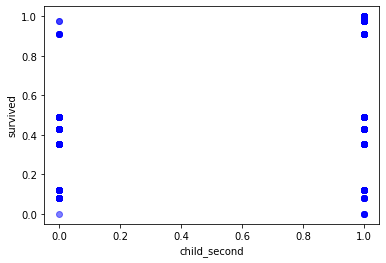

In [13]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
titanic_x3 = pd.get_dummies(titanic['who_class'], drop_first=True)
#titanic_y = titanic['survived']

titanic_model3 = sm.OLS(titanic_y,titanic_x3).fit()
titanic_prediction3 = titanic_model3.predict(titanic_x3)
titanic_model3.summary()
r2_score(titanic_y,titanic_prediction1)
titanic_model3.rsquared

titanic_fig3, titanic_ax3 = plt.subplots()
#titanic_ax.scatter(titanic_x.iloc[:,1], titanic_y, color='orange',alpha=0.5)
titanic_ax3.scatter(titanic_y, titanic_prediction3, color='blue',alpha=0.5)
plt.xlabel("child_second")
plt.ylabel("survived")

0.434625584890842


Text(0, 0.5, 'titanic_prediction_reg')

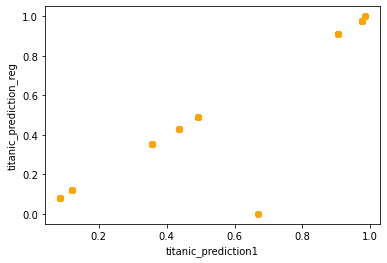

In [14]:
# titanic_x = pd.get_dummies(titanic['who_class'], drop_first=True)
# titanic_y = titanic['survived']
titanic_model4 = sm.OLS(titanic_y,titanic_x3).fit_regularized(L1_wt=1,alpha=0.5)
clf = Ridge(alpha=1.0)
clf.fit(titanic_x3, titanic_y)
y_prediction4 = clf.predict(titanic_x3)
# titanic_prediction_reg = titanic_model1.predict(titanic_x)
r2 = r2_score(titanic_y,y_prediction4)
print(r2)
# # titanic_model1.rsquared
titanic_fig4, titanic_ax4 = plt.subplots()
titanic_ax4.scatter(y_prediction4, titanic_prediction3, color='orange',alpha=0.5)
#titanic_ax.scatter(titanic_x.iloc[:,1], titanic_prediction1, color='blue',alpha=0.5)
plt.xlabel("titanic_prediction1")
plt.ylabel("titanic_prediction_reg")

# House Price prediction

Using the techniques you learned, use everything you can to build the best **interpretable** (eg. non-regularized) regression model on the `house_price.csv` dataset. You also have `house_price_data_description.txt` to help -- full description of each column.

Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. **This is the target variable that you're trying to predict.**

Here are the features you can use (or engineer into new features!) for your `X` matrix:

    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

In [17]:
house_price = pd.read_csv('data/house_price.csv')
house_price.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [18]:
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
hp_neighbour = pd.get_dummies(house_price['Neighborhood'], drop_first=True,prefix = "hp_neighbour_")
hp_building = pd.get_dummies(house_price['BldgType'], drop_first=True,prefix = "hp_buildType_")
hp_centralAir = pd.get_dummies(house_price['CentralAir'], drop_first=True,prefix = "hp_centralAir_")
hp_KitchenQ = pd.get_dummies(house_price['KitchenQual'], drop_first=True,prefix = "hp_kichen_Q")

In [20]:
house_price_x = pd.concat([hp_neighbour,hp_building,hp_centralAir,hp_KitchenQ,house_price['YearBuilt'],house_price['LotArea'],house_price['BedroomAbvGr'],house_price['GarageArea']],axis=1)
house_price_y = house_price['SalePrice']

house_price_x = sm.add_constant(house_price_x)
hp_model = sm.OLS(house_price_y,house_price_x).fit()
hp_predict = hp_model.predict()

hp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     117.5
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:48:54   Log-Likelihood:                -17537.
No. Observations:                1460   AIC:                         3.515e+04
Df Residuals:                    1423   BIC:                         3.534e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7.611e+05   1.63e+05     -4.674      0.000   -1.08e+06   -4.42e+05
hp_neighbour__Blueste  -1.42e+04   3.06e+04     -0.464      0.643   -7.43e+04    4.59e+04
hp_neighbour__BrDale  -2.885e+04   1.57e+04     -1.838      0.066   -5.96e+04    1941.259
hp_neighbour__BrkSide -3.227e+04   1.32e+04     -2.450      0.014   -5.81e+04   -6428.219
hp_neighbour__ClearCr  -1.68e+04   1.37e+04     -1.223      0.221   -4.37e+04    1.01e+04
hp_neighbour__CollgCr -3.477e+04   1.12e+04     -3.097      0.002   -5.68e+04   -1.27e+04
hp_neighbour__Crawfor  2.203e+04   1.29e+04      1.711      0.087   -3222.580    4.73e+04
hp_neighbour__Edwards -4.964e+04    1.2e+04     -4.129      0.000   -7.32e+04   -2.61e+04
hp_neighbour__Gilbert -3.121e+04   1.19e+04     -2.626      0.009   -5.45e+04   -7899.668
hp_neighbour__IDOTRR  -5.157e+04   1.39e+04     -3.721      0.000   -7.88e+04   -2.44e+04
hp_neighbour__MeadowV -4.207e+04   1.46e+04     -2.874      0.004   -7.08e+04   -1.34e+04
hp_neighbour__Mitchel -4.261e+04   1.24e+04     -3.435      0.001   -6.69e+04   -1.83e+04
hp_neighbour__NAmes   -4.401e+04   1.16e+04     -3.781      0.000   -6.68e+04   -2.12e+04
hp_neighbour__NPkVill -1.264e+04   1.72e+04     -0.736      0.462   -4.63e+04     2.1e+04
hp_neighbour__NWAmes  -2.886e+04   1.21e+04     -2.394      0.017   -5.25e+04   -5214.063
hp_neighbour__NoRidge  6.972e+04   1.26e+04      5.526      0.000     4.5e+04    9.45e+04
hp_neighbour__NridgHt  3.336e+04   1.16e+04      2.880      0.004    1.06e+04    5.61e+04
hp_neighbour__OldTown   -3.8e+04   1.29e+04     -2.957      0.003   -6.32e+04   -1.28e+04
hp_neighbour__SWISU   -2.611e+04   1.47e+04     -1.778      0.076   -5.49e+04    2699.227
hp_neighbour__Sawyer  -5.039e+04   1.23e+04     -4.113      0.000   -7.44e+04   -2.64e+04
hp_neighbour__SawyerW  -2.97e+04   1.19e+04     -2.494      0.013   -5.31e+04   -6338.776
hp_neighbour__Somerst -1.376e+04   1.13e+04     -1.220      0.223   -3.59e+04    8367.400
hp_neighbour__StoneBr  6.031e+04    1.3e+04      4.651      0.000    3.49e+04    8.57e+04
hp_neighbour__Timber  -1.469e+04   1.28e+04     -1.147      0.252   -3.98e+04    1.04e+04
hp_neighbour__Veenker  1.596e+04   1.61e+04      0.993      0.321   -1.56e+04    4.75e+04
hp_buildType__2fmCon  -6412.6704   7837.443     -0.818      0.413   -2.18e+04    8961.512
hp_buildType__Duplex  -2.077e+04   6116.018     -3.396      0.001   -3.28e+04   -8773.608
hp_buildType__Twnhs   -3.775e+04   8289.620     -4.554      0.000    -5.4e+04   -2.15e+04
hp_buildType__TwnhsE  -2.726e+04   5338.962     -5.105      0.000   -3.77e+04   -1.68e+04
hp_centralAir__Y       1.135e+04   5051.741      2.247      0.025    1443.633    2.13e+04
hp_kichen_Q_Fa         -1.02e+05   8802.627    -11.593      0.000   -1.19e+05   -8.48e+04
hp_kichen_Q_Gd        -

In [21]:
house_price['Neighborhood'].unique() #Blmngtn is missing

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [22]:
house_price['BldgType'].unique()#1Fam is missing

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [23]:
house_price['KitchenQual'].unique()#1Fam is missing

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)